In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
import seaborn as sns
import datetime

In [2]:
kospi_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="KOSPI")})
kospi_list['종목명'] = kospi_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

kosdaq_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="KOSDAQ")})
kosdaq_list['종목명'] = kosdaq_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [3]:
kospi_big = (stock.get_market_cap_by_ticker('20211108', market='KOSPI').sort_values('시가총액', ascending=False)[:100]).reset_index()
kosdaq_big = (stock.get_market_cap_by_ticker('20211108', market='KOSDAQ').sort_values('시가총액', ascending=False)[:100]).reset_index()

com_kospi = kospi_list[kospi_list['종목코드'].isin(kospi_big['티커'].values)].reset_index()
com_kosdaq = kosdaq_list[kosdaq_list['종목코드'].isin(kosdaq_big['티커'].values)].reset_index()

In [4]:
df_kospi = pd.merge(kospi_big, com_kospi, how='inner', left_on='티커', right_on='종목코드').loc[:,('티커', '종목명', '시가총액', '거래량', '거래대금')]
df_kosdaq = pd.merge(kosdaq_big, com_kosdaq, how='inner', left_on='티커', right_on='종목코드').loc[:,('티커', '종목명', '시가총액', '거래량', '거래대금')]
com = pd.concat([com_kospi, com_kosdaq])
com_df = pd.concat([df_kospi, df_kosdaq])

In [5]:
def get_20(name):
    todate = str(datetime.datetime.today())[:10]
    tic = com[com['종목명']==name]['종목코드'].values[0]
    close = stock.get_market_ohlcv_by_date(fromdate='20210501', todate=todate, ticker=tic, freq='d')
    amount = stock.get_market_ohlcv_by_date(fromdate='20210501', todate=todate, ticker=tic, freq='d')['거래량']
    volume = stock.get_market_trading_volume_by_date(fromdate='20210501', todate='20211116', ticker=tic)

    close['ma20'] = close['종가'].rolling(window=20).mean() # 20일 이동평균
    close['stddev'] = close['종가'].rolling(window=20).std() # 20일 이동표준편차
    close['upper'] = close['ma20'] + 2*close['stddev'] # 상단밴드
    close['lower'] = close['ma20'] - 2*close['stddev'] # 하단밴드
    close_df = close.loc[:, ['종가', 'ma20', 'upper', 'lower']]
    plt.figure(figsize=(10,6))

    plt.subplot(111)
    plt.plot(close_df)
    plt.title(f"{name}의 종가")
    plt.legend(['종가', 'ma20'])

    # plt.subplot(312)
    # plt.plot(amount)
    # plt.title(f"{name}의 거래량")

    # plt.subplot(313)
    # plt.plot(volume)
    # plt.legend(['기관', '기타', '개인', '외국인'])

    return plt.show()

In [6]:
def get_224(name):

    todate = str(datetime.datetime.today())[:10]
    fromdate = '20160101'
    tic = com[com['종목명']==name]['종목코드'].values[0]
    close = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=tic, freq='d')
    amount = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=tic, freq='d')['거래량']
    volume = stock.get_market_trading_volume_by_date(fromdate='20210501', todate='20211116', ticker=tic)

    close['ma20'] = close['종가'].rolling(window=224).mean() # 20일 이동평균
    close['stddev'] = close['종가'].rolling(window=224).std() # 20일 이동표준편차
    close['upper'] = close['ma20'] + 2*close['stddev'] # 상단밴드
    close['lower'] = close['ma20'] - 2*close['stddev'] # 하단밴드
    close_df = close.loc[:, ['종가', 'ma20', 'upper', 'lower']]

    plt.figure(figsize=(10,6))

    plt.subplot(111)
    plt.plot(close_df)
    plt.title(f"{name}의 종가")
    plt.legend(['종가', 'ma20'])

    # plt.subplot(412)
    # plt.plot(amount)
    # plt.axhline(amount.mean(), color='r', linestyle='--')
    # plt.title(f"{name}의 거래량")

    # plt.subplot(413)
    # plt.plot(volume)
    # plt.legend(['기관', '기타', '개인', '외국인'])
    # plt.title('주체별 비중')


    # plt.subplot(414)
    # plt.plot(volume.apply(lambda x: np.sum(abs(x)), axis=1))
    # plt.title('주체별총합')

    return plt.show()

In [7]:
def get_graph(name):
    todate = str(datetime.datetime.today())[:10]
    tic = com[com['종목명']==name]['종목코드'].values[0]
    close = stock.get_market_ohlcv_by_date(fromdate='20210501', todate=todate, ticker=tic, freq='d')
    amount = stock.get_market_ohlcv_by_date(fromdate='20210501', todate=todate, ticker=tic, freq='d')['거래량']
    volume = stock.get_market_trading_volume_by_date(fromdate='20210501', todate='20211116', ticker=tic)

    close['ma20'] = close['종가'].rolling(window=20).mean() # 20일 이동평균
    close['stddev'] = close['종가'].rolling(window=20).std() # 20일 이동표준편차
    close['upper'] = close['ma20'] + 2*close['stddev'] # 상단밴드
    close['lower'] = close['ma20'] - 2*close['stddev'] # 하단밴드
    close_df = close.loc[:, ['종가', 'ma20', 'upper', 'lower']]

    close['ma20'] = close['종가'].rolling(window=224).mean() # 20일 이동평균
    close['stddev'] = close['종가'].rolling(window=224).std() # 20일 이동표준편차
    close['upper'] = close['ma20'] + 2*close['stddev'] # 상단밴드
    close['lower'] = close['ma20'] - 2*close['stddev'] # 하단밴드
    close_df = close.loc[:, ['종가', 'ma20', 'upper', 'lower']]

    plt.figure(figsize=(16,8))

    plt.subplot(121)
    plt.plot(close_df)
    plt.title(f"{name}의 종가")
    plt.legend(['종가', 'ma20'])

    plt.subplot(122)
    plt.plot(close_df)
    plt.title(f"{name}의 종가")
    plt.legend(['종가', 'ma224'])  
    
    return plt.show()

In [8]:
names = com['종목명'].values
len(names)

200

In [9]:
def get_name(name, fromdate, todate):
    name = name
    ticker = com.loc[com['종목명']==name, '종목코드']
    df = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker)
    df = df.rename(columns={'시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
    df['ma20'] = df['Close'].rolling(window=20).mean() # 20일 이동표준편차
    df['stddev'] = df['Close'].rolling(window=20).std() # 20일 이동표준편차
    df['upper'] = df['ma20'] + 2*df['stddev'] # 상단밴드
    df['lower'] = df['ma20'] - 2*df['stddev'] # 하단밴드
    df = df[19:] # 20일 이동평균을 구했기 때문에 20번째 행부터 값이 들어가 있음
    df.insert(0, column='volatility', value=0)

    df['volatility'] = (df['upper'] - df['lower'])

    return df[::-1]


In [10]:
## filter 1 ###
select = []
fromdate = '20210501'
todate = str(datetime.datetime.today())[:10]
for name in names:
    tick = get_name(name, fromdate, todate)
    try:
        if ((tick['Close'][0] < tick['upper'][0]) & (tick['Close'][1] > tick['upper'][1])):
            select.append(name)
    except:
        continue
len(select)

4

In [11]:
select

['LG이노텍', '일진머티리얼즈', '덕산네오룩스', '위메이드']

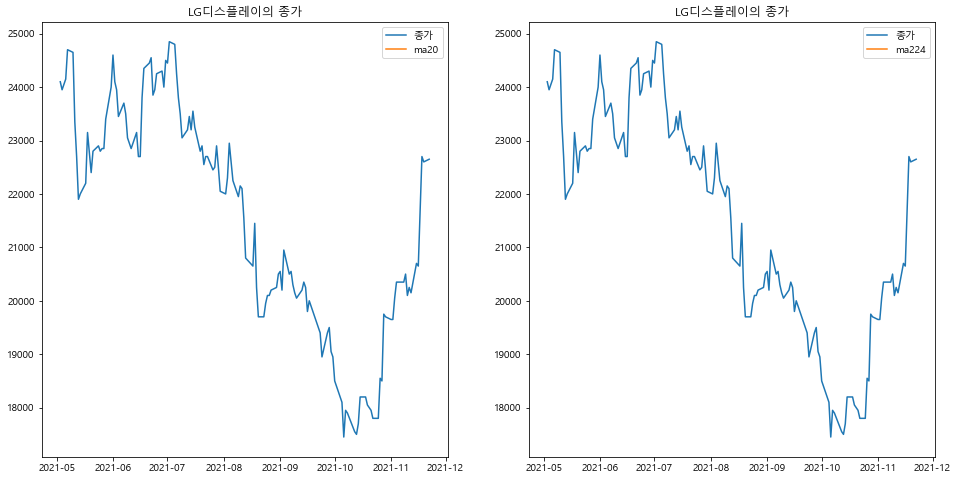

In [12]:
get_graph('LG디스플레이')